In [43]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
new = pd.read_csv(r"C:\Users\suvar\Desktop\Linear Regression\SampleSuperstore.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [45]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

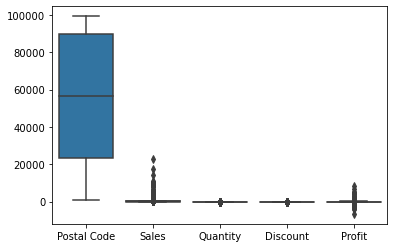

In [46]:
sns.boxplot(data=new)

In [47]:
q1 = new['Postal Code'].quantile(0.25)
q3 = new['Postal Code'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

190185.5

In [48]:
new['Postal Code']=np.where(new['Postal Code'] > upper_limit,upper_limit,new['Postal Code']) 

<AxesSubplot:>

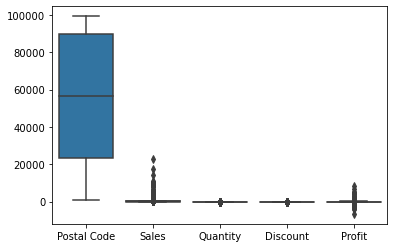

In [49]:
sns.boxplot(data=new)

In [50]:
q1 = new['Sales'].quantile(0.25)
q3 = new['Sales'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

498.93

In [51]:
new['Sales']=np.where(new['Sales'] > upper_limit,upper_limit,new['Sales']) 

<AxesSubplot:>

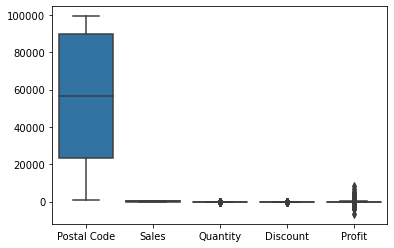

In [52]:
sns.boxplot(data=new)

In [53]:
q1 = new['Quantity'].quantile(0.25)
q3 = new['Quantity'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

9.5

In [54]:
new['Quantity']=np.where(new['Quantity'] > upper_limit,upper_limit,new['Quantity']) 

<AxesSubplot:>

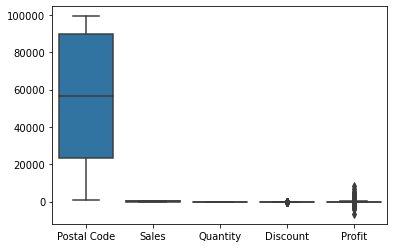

In [55]:
sns.boxplot(data=new)

In [56]:
q1 = new['Discount'].quantile(0.25)
q3 = new['Discount'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.5

In [57]:
new['Discount']=np.where(new['Discount'] > upper_limit,upper_limit,new['Discount']) 

<AxesSubplot:>

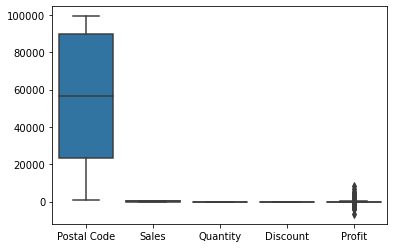

In [58]:
sns.boxplot(data=new)

In [59]:
q1 = new['Profit'].quantile(0.25)
q3 = new['Profit'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

70.816875

In [60]:
new['Profit']=np.where(new['Profit'] > upper_limit,upper_limit,new['Profit']) 

<AxesSubplot:>

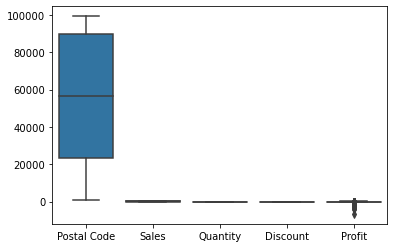

In [61]:
sns.boxplot(data=new)

In [62]:
new.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,140.281105,3.753352,0.137451,4.427630
std,32063.693350,168.804241,2.102557,0.157680,131.993182
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,498.930000,9.500000,0.500000,70.816875


In [63]:
new.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [64]:
new.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.960,2.0,0.00,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,498.930,3.0,0.00,70.816875
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.620,2.0,0.00,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,498.930,5.0,0.45,-383.031000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.368,2.0,0.20,2.516400


In [65]:
# Putting feature variable to X
X = new.drop('Postal Code', axis= 1)

# Putting response variable to y
y = new[['Postal Code']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [66]:
df= pd.concat([y_train, X_train], axis=1)
df.head()

,Postal Code,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4095,41042.0,Standard Class,Consumer,United States,Florence,Kentucky,South,Technology,Phones,498.930,3.0,0.0,70.816875
2620,88220.0,Standard Class,Corporate,United States,Carlsbad,New Mexico,West,Office Supplies,Storage,37.320,3.0,0.0,10.449600
9477,60653.0,Second Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,3.564,3.0,0.5,-6.237000
9388,5408.0,Standard Class,Consumer,United States,Burlington,Vermont,East,Office Supplies,Appliances,498.930,3.0,0.0,70.816875
6510,10009.0,Standard Class,Corporate,United States,New York City,New York,East,Office Supplies,Paper,34.020,3.0,0.0,16.669800


In [67]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.003377,0.012410,0.060970,0.002515
Sales,-0.003377,1.000000,0.268744,-0.021117,-0.055302
Quantity,0.012410,0.268744,1.000000,0.002563,-0.021664
Discount,0.060970,-0.021117,0.002563,1.000000,-0.323246
Profit,0.002515,-0.055302,-0.021664,-0.323246,1.000000


<AxesSubplot:>

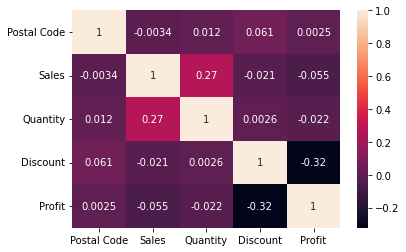

In [68]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'Postal Code vs Sales'}, xlabel='Sales', ylabel='Postal Code'>

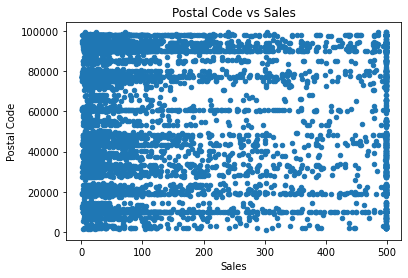

In [71]:
df.plot.scatter(x='Sales', y='Postal Code', title='Postal Code vs Sales')